In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
data=pd.read_csv('dataset.csv')

In [121]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [123]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [124]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [125]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [126]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [128]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3


In [129]:
data.sex.unique()

array([1, 0])

In [130]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [131]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [132]:
numerical_columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal',]

In [133]:
# Hnadling Missing Values and feature scaling.

num_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
                        ])


In [134]:
Preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_columns)


]


)

In [135]:
X_train=Preprocessor.fit_transform(X_train)
X_test=Preprocessor.transform(X_test)

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
    

In [137]:
classifier=RandomForestClassifier(max_depth=10)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [138]:
y_pred=classifier.predict(X_test)


In [139]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [140]:
accuracy_score=accuracy_score(y_test,y_pred)
print(accuracy_score)
metrix=confusion_matrix(y_test,y_pred)
print(metrix)
report=classification_report(y_test,y_pred)
print(report)

0.8351648351648352
[[33 11]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [141]:
from sklearn.model_selection import RandomizedSearchCV

In [142]:
params={'max_depth':[2,5,9,None],
        'n_estimators':[100,200,300],
        'criterion':['gini','entropy'],
        'n_estimators':[10,50,90]
        
              }

In [143]:
cv=RandomizedSearchCV(classifier,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=9, n_estimators=10;, score=0.721 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, n_estimators=10;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, n_estimators=10;, score=0.810 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, n_estimators=10;, score=0.714 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, n_estimators=10;, score=0.786 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=90;, score=0.837 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=90;, score=0.837 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=90;, score=0.833 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=90;, score=0.762 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=90;, score=0.857 total time=   0.2s
[CV 1/5] END criterion=gini, 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 9, None],
                                        'n_estimators': [10, 50, 90]},
                   scoring='accuracy', verbose=3)

In [144]:
cv.best_params_

{'n_estimators': 10, 'max_depth': 5, 'criterion': 'entropy'}

In [146]:
import seaborn as sns

<AxesSubplot: >

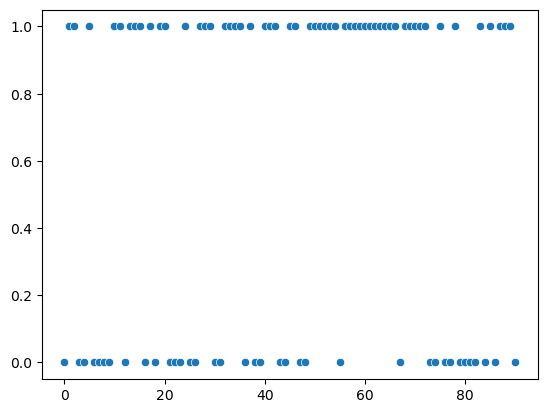

In [147]:
sns.scatterplot(y_pred,y_test)